In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 32
plt.rcParams['axes.labelsize'] = 24
from skimage import transform
%matplotlib inline

In [2]:
from keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

Using TensorFlow backend.


### Данные:
Будем работать с датасетом [Boston Housing Prices](https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef).

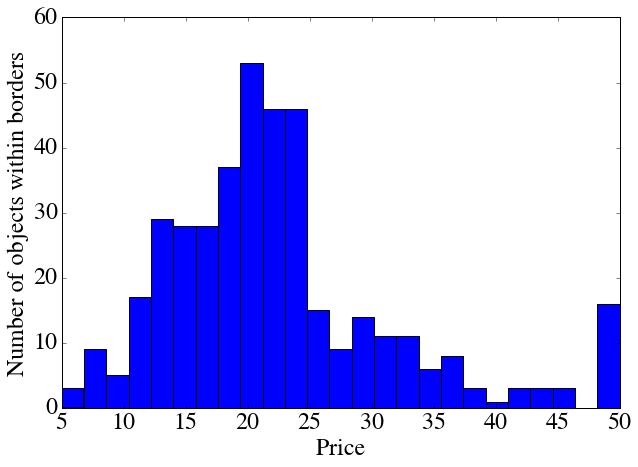

In [3]:
plt.figure(figsize=(10,7))
plt.hist(y_train, bins=25)
plt.ylabel('Number of objects within borders')
plt.xlabel('Price')
plt.show()

### Задание.
Будем решать задачу регрессии. Целевая переменная -- цена дома, признаки - различная информация о домохозяйстве. Для решения будем использовать линейную регрессию. Ваша задача - оценить качество решения в зависимости от количества объектов в обучающей выборке. Качество решения будем оценивать с помощью среднеквадратичной и среднеабсолютной ошибки, а так же [коэффициента детерминации $r^2$](http://scikit-learn.org/stable/modules/model_evaluation.html#r2-score-the-coefficient-of-determination). Также требуется оценить дисперсию данных функционалов в зависимости от числа объектов в обучающей выборке. 

*Обращаем ваше внимание, что для качественной оценки данных зависимостей эксперименты для каждого размера выборки стоит повторять многократно на различных случайных подвыборках.*

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

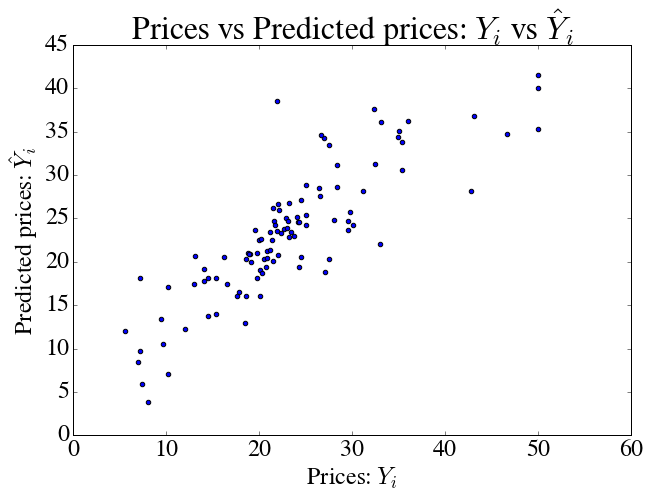

In [5]:
lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)
plt.figure(figsize=(10,7))
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [6]:
print('mae = {}'.format(mean_absolute_error(y_test, y_pred)))
print('mse = {}'.format(mean_squared_error(y_test, y_pred)))
print('prediction variance = {}'.format(np.std((y_test - y_pred)**2)))

mae = 3.46418581241
mse = 23.1955992564
prediction variance = 45.7804868503


Now we iterate over different sizes of $X_{train}$ subset and fit a linear regeression on these subsets, averaging metrics on subsets of the same sized (which are choosed randomly) 

In [7]:
#initialization of arrays for metrics and their variances 
maes = np.zeros(95)
mses = np.zeros(95)
r2scores = np.zeros(95)
maes_disp = np.zeros(95)
mses_disp = np.zeros(95)
r2scores_disp = np.zeros(95)

train_sizes = np.arange(95)
averaging = 40

for nums in train_sizes:
    mae_inst = 0
    mse_inst = 0
    r2score_inst = 0
    mae_inst_sq = 0
    mse_inst_sq = 0
    r2score_inst_sq = 0
    for iters in np.arange(averaging):
        #random choice of subset of X_train
        inds = np.random.choice(np.arange(404), size=nums*4+28, replace=False) 
        lm = LinearRegression()
        lm.fit(X_train[inds, :], y_train[inds])
        #prediction on X_test
        y_pred = lm.predict(X_test)
        #metrics computation
        mae_inst += mean_absolute_error(y_test, y_pred)
        mse_inst += mean_squared_error(y_test, y_pred)
        r2score_inst += r2_score(y_test, y_pred)
        mae_inst_sq += mean_absolute_error(y_test, y_pred)**2
        mse_inst_sq += mean_squared_error(y_test, y_pred)**2
        r2score_inst_sq += r2_score(y_test, y_pred)**2
    #metrics averaging on subsets of fixed size
    maes[nums] = mae_inst / averaging
    mses[nums] = mse_inst / averaging
    r2scores[nums] = r2score_inst / averaging
    maes_disp[nums] = mae_inst_sq /averaging - (mae_inst / averaging)**2
    mses_disp[nums] = mse_inst_sq /averaging - (mse_inst / averaging)**2
    r2scores_disp[nums] = r2score_inst_sq /averaging - (r2score_inst / averaging)**2

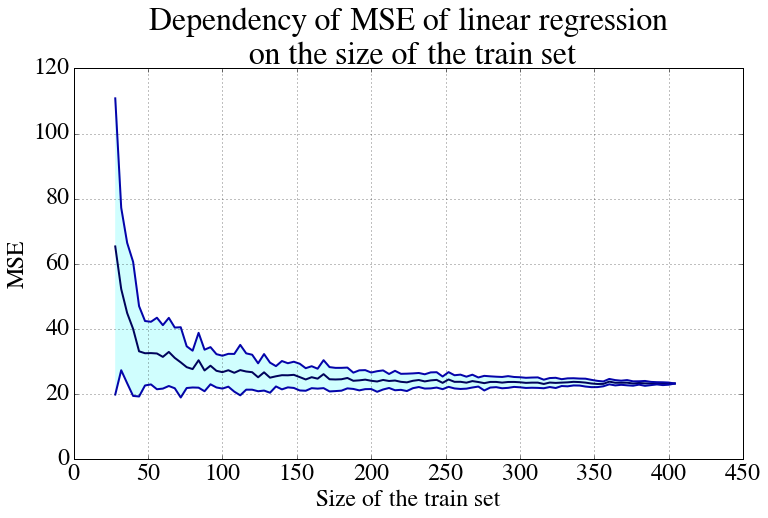

In [8]:
x_range = train_sizes*4+28
plt.figure(figsize=(12, 7))
plt.plot(x_range, mses, color='#00035b')
plt.plot(x_range, mses+np.sqrt(abs(mses_disp)), color='#0504aa')
plt.plot(x_range, mses-np.sqrt(abs(mses_disp)), color='#0504aa')
plt.fill_between(x_range, mses+np.sqrt(abs(mses_disp)), mses-np.sqrt(abs(mses_disp)), color='#d0fefe')
plt.grid(True)
plt.plot
plt.xlabel("Size of the train set")
plt.ylabel("MSE")
plt.title("Dependency of MSE of linear regression\n on the size of the train set")

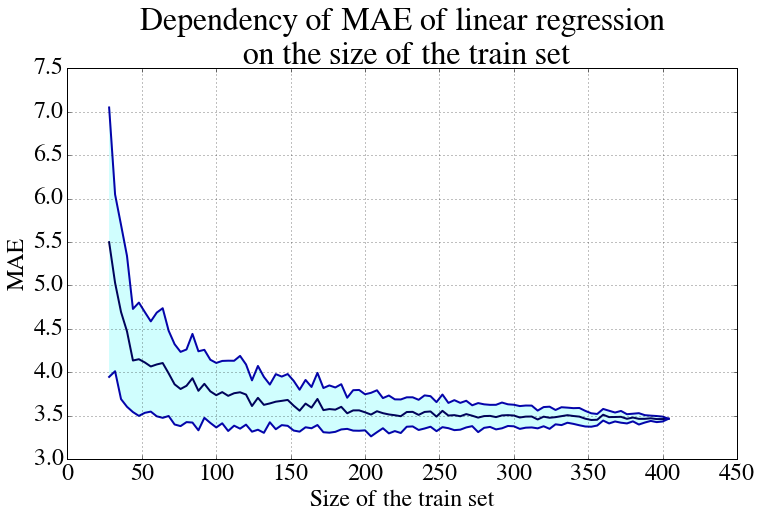

In [10]:
x_range = train_sizes*4+28
plt.figure(figsize=(12, 7))
plt.plot(x_range, maes, color='#00035b')
plt.plot(x_range, maes+np.sqrt(abs(maes_disp)), color='#0504aa')
plt.plot(x_range, maes-np.sqrt(abs(maes_disp)), color='#0504aa')
plt.fill_between(x_range, maes+np.sqrt(abs(maes_disp)), maes-np.sqrt(abs(maes_disp)), color='#d0fefe')
plt.grid(True)
plt.plot
plt.xlabel("Size of the train set")
plt.ylabel("MAE")
plt.title("Dependency of MAE of linear regression\n on the size of the train set")
plt.savefig('Plot1.png')

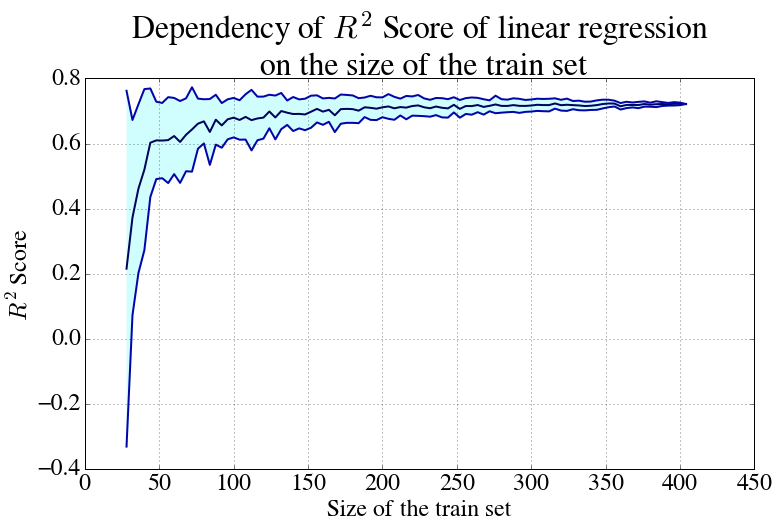

In [11]:
x_range = train_sizes*4+28
plt.figure(figsize=(12, 7))
plt.plot(x_range, r2scores, color='#00035b')
plt.plot(x_range, r2scores+np.sqrt(abs(r2scores_disp)), color='#0504aa')
plt.plot(x_range, r2scores-np.sqrt(abs(r2scores_disp)), color='#0504aa')
plt.fill_between(x_range, r2scores+np.sqrt(abs(r2scores_disp)), r2scores-np.sqrt(abs(r2scores_disp)), color='#d0fefe')
plt.grid(True)
plt.xlabel("Size of the train set")
plt.ylabel("$R^2$ Score")
plt.title("Dependency of $R^2$ Score of linear regression\n on the size of the train set")

Now we try to change number of features and look, how metrics change:

In [12]:
#initialization of arrays for metrics and their variances 
maes = np.zeros(14)
mses = np.zeros(14)
r2scores = np.zeros(14)

feature_sets = np.arange(14)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
maes[13] = mean_absolute_error(y_test, y_pred)
mses[13] = mean_squared_error(y_test, y_pred)
r2scores[13] = r2_score(y_test, y_pred)

for nums in feature_sets[:13]:
    lm = LinearRegression()
    #leaving out one feature
    lm.fit(X_train[:, np.arange(X_train.shape[1])!=nums], y_train)
    #prediction on X_test
    y_pred = lm.predict(X_test[:, np.arange(X_test.shape[1])!=nums])
    #metrics computation
    maes[nums] = mean_absolute_error(y_test, y_pred)
    mses[nums] = mean_squared_error(y_test, y_pred)
    r2scores[nums] = r2_score(y_test, y_pred)

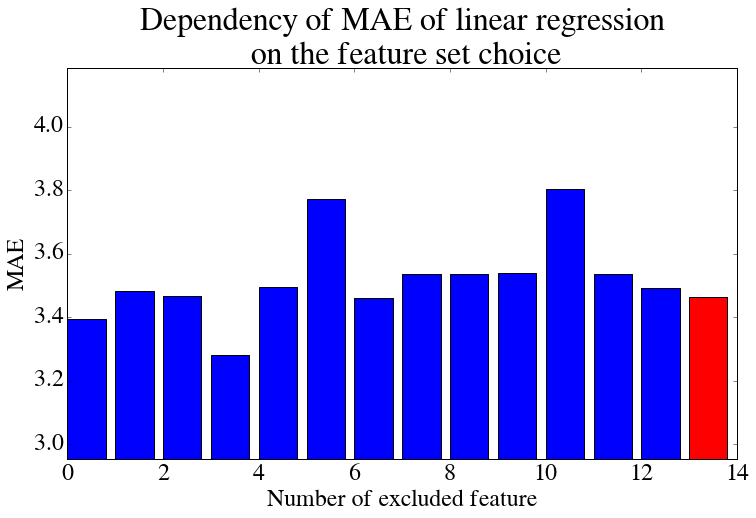

In [13]:
plt.figure(figsize=(12, 7))
plt.bar(np.arange(13), maes[:13]-np.amin(maes)*0.9, bottom = np.amin(maes)*0.9, color='blue')
plt.bar(13, maes[13]-np.amin(maes)*0.9, bottom = np.amin(maes)*0.9, color='red')
plt.ylim((np.amin(maes)*0.9, np.amax(maes)*1.1))
plt.xlabel("Number of excluded feature")
plt.ylabel("MAE")
plt.title("Dependency of MAE of linear regression\n on the feature set choice")

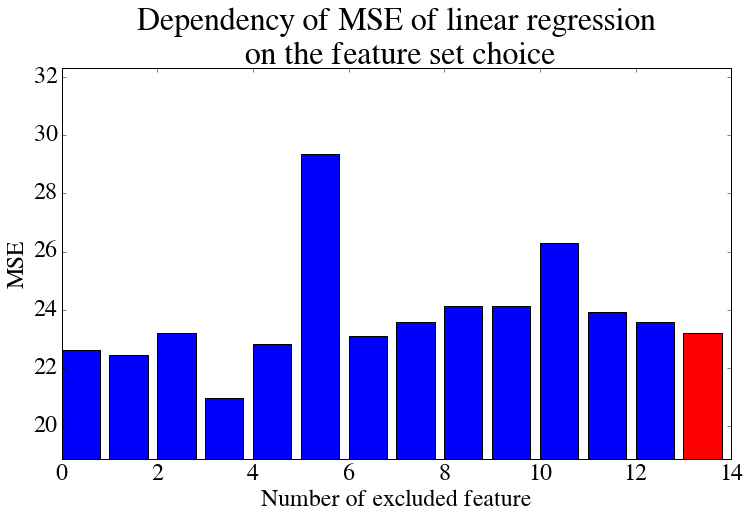

In [14]:
plt.figure(figsize=(12, 7))
plt.bar(np.arange(13), mses[:13]-np.amin(mses)*0.9, bottom = np.amin(mses)*0.9, color='blue')
plt.bar(13, mses[13]-np.amin(mses)*0.9, bottom = np.amin(mses)*0.9, color='red')
plt.ylim((np.amin(mses)*0.9, np.amax(mses)*1.1))
plt.xlabel("Number of excluded feature")
plt.ylabel("MSE")
plt.title("Dependency of MSE of linear regression\n on the feature set choice")

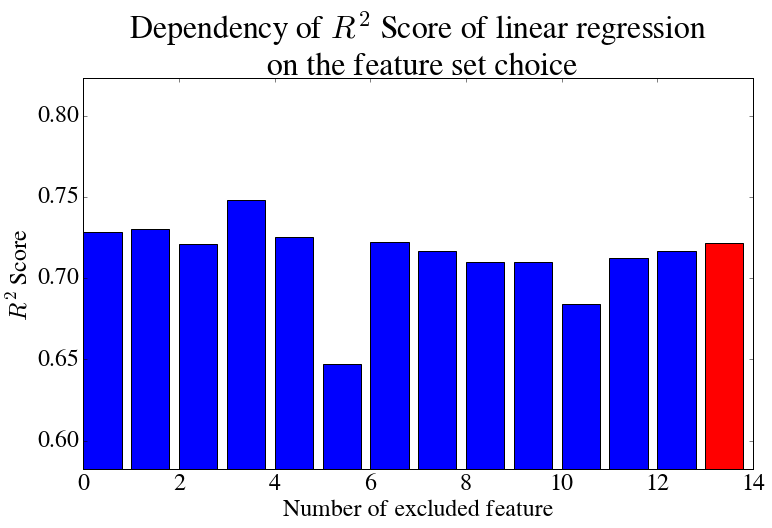

In [15]:
plt.figure(figsize=(12, 7))
plt.bar(np.arange(13), r2scores[:13]-np.amin(r2scores)*0.9, bottom = np.amin(r2scores)*0.9, color='blue')
plt.bar(13, r2scores[13]-np.amin(r2scores)*0.9, bottom = np.amin(r2scores)*0.9, color='red')
plt.ylim((np.amin(r2scores)*0.9, np.amax(r2scores)*1.1))
plt.xlabel("Number of excluded feature")
plt.ylabel("$R^2$ Score")
plt.title("Dependency of $R^2$ Score of linear regression\n on the feature set choice")


We can see that feautures #5 and #10 are important for regression, i.e. their exclusion raises error; at the same time feature #3 makes the quality better if excluded from dataset